In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('/Users/user/Desktop/EliteBook 2020/datasasaR/Data_Competitions/Titanic project/titanic_data.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Looking for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Fill in missing values using the mean for the age column without creating new dataframe
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

<Figure size 432x288 with 0 Axes>

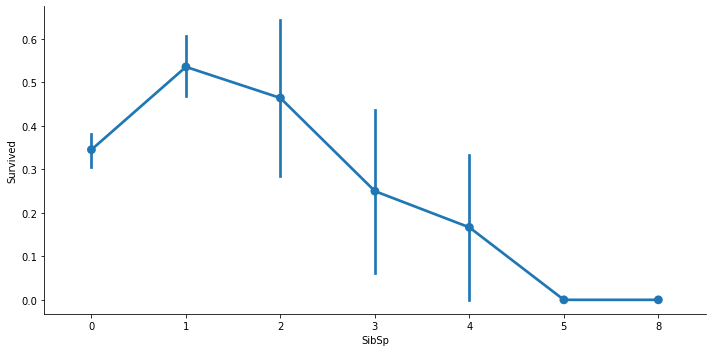

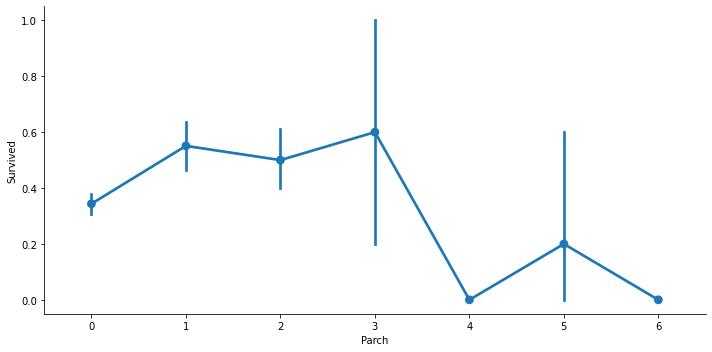

In [7]:
# create a plot for each column, the bars represent the sample size for each feature
#it shows the more dependants we had , the more less people who survived
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data = titanic, kind='point', aspect=2,)

In [9]:
#since the above features are similar and have the same relationship,we combine them into one feature
#if it gives a key error, check the spelling of your variables
titanic['Family_cnt']= titanic['SibSp']+ titanic['Parch']

In [10]:
#Drop unnecessary features such as the ones above and passenger id, axis =1 because we are only dropping columns 
#retaining the rows and inplace = True because we are maintaining the data frame
titanic.drop(['SibSp', 'Parch', 'PassengerId'], axis = 1, inplace = True)

In [11]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [12]:
#Clean up categorical features
# something special to inform out data is to see if the cabin missing is intended or missed during data entry, are there people who actually did not have a cabin and survived
# we shall groupby cabin column and analyse using our Survived column
#Create binary values of Cabin present or not present and compare with survive
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()


Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [13]:
#From the information above, we can see that more than 60 percent of cabin not missing survived, cabin being null
#means that there are some people who didnot have a cabin and therefore did not survive
#From this we can create an indicator stating those who were missing a cabin and those who were not
#use the where statement and create and 'if' statement displaying which rows had no cabin as the condition then perform action of indicating
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0,1)

In [14]:
#Convert the sex to integers
#Create a dictionary that changes gender to numerical values
#Pass that dictionary to the map function of the column and replace the existing sex column
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

In [15]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [16]:
#Drop unnecessary features and reason why
#Embarked= this was not a casual relationship meaning the place of embarkement did not cause survival or no survival
#Ticket and Name are simply unique identifiers and have no relationship with the survival rate
#Cabin is also eliminatedd because this has been taken care of by the cabin indicator, the numbers just keep on repeating
titanic.drop(['Name','Ticket','Embarked', 'Cabin'], axis = 1, inplace= True)

In [20]:
#Write out clean dataset without the index
titanic.to_csv('/Users/user/Desktop/EliteBook 2020/datasasaR/Data_Competitions/Titanic project/titanic_cleaned.csv', index=False)

In [21]:
print(titanic)

     Survived  Pclass  Sex        Age     Fare  Family_cnt  Cabin_ind
0           0       3    0  22.000000   7.2500           1          0
1           1       1    1  38.000000  71.2833           1          1
2           1       3    1  26.000000   7.9250           0          0
3           1       1    1  35.000000  53.1000           1          1
4           0       3    0  35.000000   8.0500           0          0
..        ...     ...  ...        ...      ...         ...        ...
886         0       2    0  27.000000  13.0000           0          0
887         1       1    1  19.000000  30.0000           0          1
888         0       3    1  29.699118  23.4500           3          0
889         1       1    0  26.000000  30.0000           0          1
890         0       3    0  32.000000   7.7500           0          0

[891 rows x 7 columns]
